In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from os import path
from time import time
from sklearn import manifold
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
"""
  Based on HRV data,
  merge Diabetes Data together
  merge Healthy  Data together
  for TSNE and UMAP analysis
"""
Diabetes = list(range(1,10))   # 10
Diabetes.remove(3)
Diabetes.remove(9)
Healthy  = list(range(1,21))   # 21
Healthy.remove(12)             # healthy #12 may be a diabetes

k = 0;
group = Diabetes
subdir = 'Diabetes'   # Healthy, Diabetes
for i in group:
  fname1 = '/content/gdrive/MyDrive/Summer Research/Glucose/'+subdir+'/glucose (' + str(i) + ').csv'
  print(fname1)
  x = pd.read_csv(fname1, delimiter=',')     #  load data 

  x['glucose_L0'] = x['glucose']
  for t in range(1,7):         # L? is a time series lag operator of lag ?
    x['glucose_L'+str(t)] = x['glucose'].shift(t)

  num = x.iloc[0:,5]
  num[0:] = i
  if k==0:
    df1 = x.iloc[0:,5:]
    df2 = num
  else:
    df1 = df1.append(x.iloc[0:,5:])
    df2 = df2.append(num)

  k += 1

group = Healthy
subdir = 'Healthy'   # Healthy, Diabetes
for i in group:
  fname1 = '/content/gdrive/MyDrive/Summer Research/Glucose/'+subdir+'/glucose (' + str(i) + ').csv'
  print(fname1)
  x = pd.read_csv(fname1, delimiter=',')     #  load data 

  x['glucose_L0'] = x['glucose']
  for t in range(1,7):         # L? is a time series lag operator of lag ?
    x['glucose_L'+str(t)] = x['glucose'].shift(t)

  num = x.iloc[0:,5]
  num[0:] = 11
  if k==0:
    df1 = x.iloc[0:,5:]
    df2 = num
  else:
    df1 = df1.append(x.iloc[0:,5:])
    df2 = df2.append(num)

  k += 1

idx = ~np.isnan(df1['glucose_L6'])
df1 = df1[idx]
df2 = df2[idx]

#tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=10)
#Y = tsne.fit_transform(df1)


/content/gdrive/MyDrive/Summer Research/Glucose/Diabetes/glucose (1).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Diabetes/glucose (2).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Diabetes/glucose (4).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Diabetes/glucose (5).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Diabetes/glucose (6).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Diabetes/glucose (7).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Diabetes/glucose (8).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Healthy/glucose (1).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Healthy/glucose (2).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Healthy/glucose (3).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Healthy/glucose (4).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Healthy/glucose (5).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Healthy/glucose (6).csv
/content/gdrive/MyDrive/Summer Research/Glucose/Healthy/g

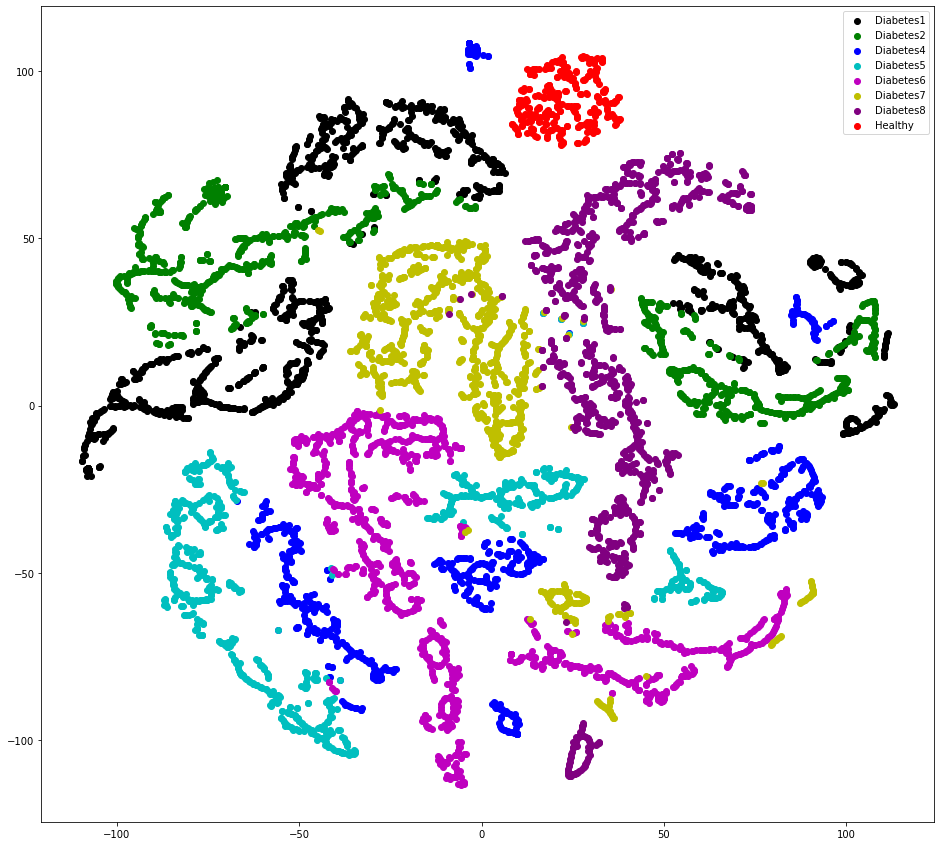

In [9]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=10)
Y = tsne.fit_transform(df1)

plt.figure(figsize=(16, 15))
colors = 'k', 'g', 'b', 'c', 'm', 'y', 'purple'
for i, c in zip(Diabetes, colors):
  plt.scatter(Y[df2 == i, 0], Y[df2 == i, 1], c=c, label='Diabetes'+str(i))
plt.scatter(Y[df2 == 11, 0], Y[df2 == 11, 1], c='r', label='Healthy')
plt.legend()
plt.show()

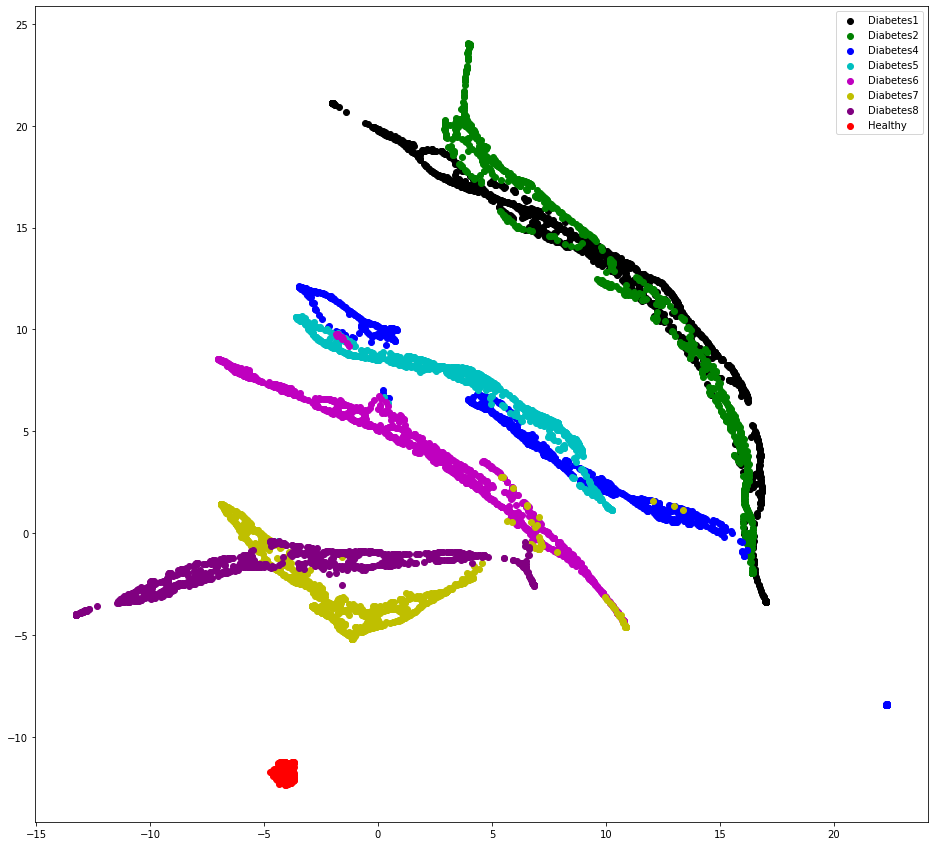

In [7]:
!pip install umap-learn
import umap
umap1 = umap.UMAP(n_components=2, random_state=10)
Y = umap1.fit_transform(df1)

plt.figure(figsize=(16, 15))
colors = 'k', 'g', 'b', 'c', 'm', 'y', 'purple'
for i, c in zip(Diabetes, colors):
  plt.scatter(Y[df2 == i, 0], Y[df2 == i, 1], c=c, label='Diabetes'+str(i))
plt.scatter(Y[df2 == 11, 0], Y[df2 == 11, 1], c='r', label='Healthy')
plt.legend()
plt.show()

In [10]:
x 

,date,time,glucose,type,comments,glucose_L0,glucose_L1,glucose_L2,glucose_L3,glucose_L4,glucose_L5,glucose_L6
0,2014-10-01,10:00,5.4,AB,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-10-01,11:34,5.4,BL,NaN,11.0,5.4,NaN,NaN,NaN,NaN,NaN
2,2014-10-01,13:38,4.8,AL,NaN,11.0,5.4,5.4,NaN,NaN,NaN,NaN
3,2014-10-01,20:39,5.8,BD,NaN,11.0,4.8,5.4,5.4,NaN,NaN,NaN
4,2014-10-01,22:38,5.6,AD,NaN,11.0,5.8,4.8,5.4,5.4,NaN,NaN
5,2014-10-02,06:27,4.8,BB,NaN,11.0,5.6,5.8,4.8,5.4,5.4,NaN
6,2014-10-02,08:27,6.2,AB,NaN,11.0,4.8,5.6,5.8,4.8,5.4,5.4
7,2014-10-02,11:30,4.9,BL,NaN,11.0,6.2,4.8,5.6,5.8,4.8,5.4
8,2014-10-02,13:31,5.2,AL,NaN,11.0,4.9,6.2,4.8,5.6,5.8,4.8
9,2014-10-02,21:08,5.2,BD,NaN,11.0,5.2,4.9,6.2,4.8,5.6,5.8
